<a href="https://colab.research.google.com/github/conorlime/CS6271/blob/main/GE%20Applied%20to%20Classification%20(Single_Type).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#**Artificial Intelligence - MSc**
##CS6271 - Evolutionary Agorithms and Humanoid Robotics 
###GE Applied to single type classification 


Leader: Conor Ryan

Developer: Allan De Lima

Tester: Enrique Naredo

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Clone this repository in which we have all functions and classes created or adapted to this work.

In [2]:
import os.path

PATH = '/content/drive/MyDrive/grape/'
if os.path.exists(PATH):
    print('grape directory already exists')
else:
    %cd /content/drive/MyDrive/
    !git clone https://github.com/UL-BDS/grape.git 
    print('Cloning grape in your Drive')

%cd /content/drive/MyDrive/grape/

grape directory already exists
/content/drive/MyDrive/grape


Import our algorithms, adapted from deap.algorithms.


Import functions used by our grammars.



In [3]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [4]:
!pip install deap==1.3 

from ponyge2_adapted_files import Grammar, ge
import algorithms
from functions import add, sub, mul, pdiv, neg

from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from deap import creator, base, tools

from sklearn.model_selection import train_test_split

     |████████████████████████████████| 152 kB 7.5 MB/s 


Set our Grammatical Evolution parameters.

In [5]:
POPULATION_SIZE = 1000
MAX_GENERATIONS = 200
P_CROSSOVER = 0.8
P_MUTATION = 0.01
ELITE_SIZE = round(0.01*POPULATION_SIZE)

HALL_OF_FAME_SIZE = 1
MAX_INIT_TREE_DEPTH = 10
MIN_INIT_TREE_DEPTH = 1
MAX_TREE_DEPTH = 17
MAX_WRAPS = 0
CODON_SIZE = 255

Set a problem to solve. Currently only spambase is packaged with GRAPE, but this could should be easy to modify for other problems.

In [6]:
problem = 'spambase'

Read datasets and grammars according to the problem picked in the previous cell.

In [7]:
if problem == 'spambase':
    X = np.zeros([4601, 57], dtype=float)
    Y = np.zeros([4601,], dtype=int)

    data = pd.read_table(r"datasets/spambase.csv")
    for i in range(4601):
        for j in range(57):
            X[i,j] = data['d'+ str(j)].iloc[i]
    for i in range(4601):
        Y[i] = data['class'].iloc[i]
        
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    
    X_train = np.transpose(X_train)
    X_test = np.transpose(X_test)
        
    GRAMMAR_FILE = 'spambase.bnf'

Print data.

In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)
pd.set_option('display.colheader_justify', 'center')

data.head()

,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31,d32,d33,d34,d35,d36,d37,d38,d39,d40,d41,d42,d43,d44,d45,d46,d47,d48,d49,d50,d51,d52,d53,d54,d55,d56,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


Print grammar.

In [9]:
f = open("grammars/" + GRAMMAR_FILE, "r")
print(f.read())
f.close() 

<e>   ::= <e>+<e>|<e>-<e>|<e>*<e>|pdiv(<e>,<e>)|neg(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|pdiv(<e>,<e>)|neg(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|pdiv(<e>,<e>)|neg(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|pdiv(<e>,<e>)|neg(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|pdiv(<e>,<e>)|neg(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|pdiv(<e>,<e>)|neg(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|pdiv(<e>,<e>)|neg(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|pdiv(<e>,<e>)|neg(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|pdiv(<e>,<e>)|neg(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|pdiv(<e>,<e>)|neg(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|pdiv(<e>,<e>)|neg(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|pdiv(<e>,<e>)|neg(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|pdiv(<e>,<e>)|neg(<e>)|x[0]|x[1]|x[2]|x[3]|x[4]|x[5]|x[6]|x[7]|x[8]|x[9]|x[10]|x[11]|x[12]|x[13]|x[14]|x[15]|x[16]|x[17]|x[18]|x[19]|x[20]|x[21]|x[22]|x[23]|x[24]|x[25]|x[26]|x[27]|x[28]|x[29]|x[30]|x[31]|x[32]|x[33]|x[34]|x[35]|x[36]|x[37]|x[38]|x[39]|x[40]|x[41]|x[42]|x[43]|x[44]|x[45]|x[46]|x[47]|x[48]|x[49]|x[50]|x[51]|x[52]|x[53]|x[54]|x[55]|x[56]|<c><c>.<c><c>|<c><c>.<c><c>|<c><c>.<c><c>|<c><c

Set up the grammar addressed by GRAMMAR_FILE in the class Grammar.

In [10]:
BNF_GRAMMAR = Grammar(path.join("grammars", GRAMMAR_FILE))

Define as fitness function the number of outputs wrongly predicted.

In [11]:
def fitness_eval(individual, points):
    x = points[0]
    Y = points[1]
    
    if individual.invalid == True:
        return np.NaN,

    # Evaluate the expression
    try:
        pred = eval(individual.phenotype)
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError):
        # FP err can happen through eg overflow (lots of pow/exp calls)
        # ZeroDiv can happen when using unprotected operators
        return np.NaN,
    assert np.isrealobj(pred)
    
    try:
        Y_class = [1 if pred[i] > 0 else 0 for i in range(len(Y))]
    except (IndexError, TypeError):
        return np.NaN,

    compare = np.equal(Y,Y_class)
    fitness = 1 - np.mean(compare)
   
    return fitness,

Create the deap toolbox.

Use negative weights in the `base.Fitness` since we are trying to minimise the fitness.

`ge.Individual` is a class with the following attributes: `phenotype`, `genome`, `tree`, `nodes`, `invalid` (True or False), `depth` and `used_codons`.

Usually, when using deap, we initialise each individual independently, and then we repeat that until we fill out the whole population. However, since we are using Position Independent Grow Initialisation, we need to initialise all individuals simultaneously.

`ge.selTournament` prevents selecting invalid individuals.

`ge.crossover_onepoint` selects crossover points within the used portion of the genome. 

Similarly, `ge.mutation_int_flip_per_codon` performs only over the effective length.



In [12]:
toolbox = base.Toolbox()

# define a single objective, minimising fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

creator.create('Individual', ge.Individual, fitness=creator.FitnessMin)

toolbox.register("populationCreator", ge.initialisation_PI_Grow, creator.Individual) 

toolbox.register("evaluate", fitness_eval)

# Tournament selection:
toolbox.register("select", ge.selTournament, tournsize=7)

# Single-point crossover:
toolbox.register("mate", ge.crossover_onepoint)

# Flip-int mutation:
toolbox.register("mutate", ge.mutation_int_flip_per_codon)


Set the main function and run it.

Set the statistics object regarding the fitness score, but there are other statistics defined internally.

Perform Grammatical Evolution using `algorithms.ge_eaSimple`, a simple evolutionary algorithm. The differences to the `algorithms.eaSimple` used by deap are:

*   We use elitism;
*   After crossover and mutation, we check the offspring to assure that the max tree depth is not violated;
*   We measure the generation and the selection times;
*   We count the number of invalid individuals.

In [13]:
# create initial population (generation 0):
population = toolbox.populationCreator(size=POPULATION_SIZE, 
                                        bnf_grammar=BNF_GRAMMAR, 
                                        min_init_tree_depth=MIN_INIT_TREE_DEPTH,
                                        max_init_tree_depth=MAX_INIT_TREE_DEPTH,
                                        max_tree_depth=MAX_TREE_DEPTH, 
                                        max_wraps=MAX_WRAPS,
                                        codon_size=CODON_SIZE
                                        )

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# prepare the statistics object:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.nanmean)
stats.register("std", np.nanstd)
stats.register("min", np.nanmin)
stats.register("max", np.nanmax)

# perform the Grammatical Evolution flow:
population, logbook = algorithms.ge_eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS, elite_size=ELITE_SIZE,
                                          bnf_grammar=BNF_GRAMMAR, codon_size=CODON_SIZE, 
                                          max_tree_depth=MAX_TREE_DEPTH, max_wraps=MAX_WRAPS,
                                          points_train=[X_train, Y_train], 
                                          points_test=[X_test, Y_test], 
                                          stats=stats, halloffame=hof, verbose=True)

gen	invalid	avg     	std     	min     	max     	fitness_test	best_ind_length	avg_length	max_length	selection_time	generation_time
0  	0      	0.472016	0.126656	0.208385	0.792857	0.230268    	78             	48.678    	354       	0             	1.80212        
1  	402    	0.386957	0.13194 	0.208385	0.749379	0.230268    	78             	45.462    	351       	0.0148718     	2.55044        
2  	127    	0.276305	0.082284	0.202174	0.70528 	0.236061    	4              	28.843    	315       	0.0148642     	1.49519        
3  	37     	0.229387	0.0555338	0.202174	0.684783	0.236061    	4              	27.751    	316       	0.0141008     	1.61614        
4  	33     	0.215062	0.0281914	0.188509	0.615839	0.186097    	54             	27.213    	315       	0.0132496     	1.67615        
5  	32     	0.218393	0.0509196	0.188509	0.61646 	0.186097    	54             	27.04     	315       	0.0133035     	2.01646        
6  	41     	0.228187	0.0767522	0.188509	0.684783	0.186097    	54             	25.708   

Extract statistics and build a nice table.

In [14]:
max_fitness_values, mean_fitness_values = logbook.select("max", "avg")
min_fitness_values, std_fitness_values = logbook.select("min", "std")
fitness_test = logbook.select("fitness_test")
best_ind_length = logbook.select("best_ind_length")
avg_length = logbook.select("avg_length")
max_length = logbook.select("max_length")
selection_time = logbook.select("selection_time")
generation_time = logbook.select("generation_time")
gen, invalid = logbook.select("gen", "invalid")

header = ['gen', 'invalid', 'avg', 'std', 'min', 'max', 'fitness_test', 'best_ind_length', 'avg_length', 'max_length', 'selection_time', 'generation_time']

results = pd.DataFrame(list(zip(gen, invalid, mean_fitness_values, std_fitness_values, min_fitness_values, max_fitness_values, fitness_test, best_ind_length, avg_length, max_length, selection_time, generation_time)),
               columns = header)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)
pd.set_option('display.colheader_justify', 'center')

display(results)

,gen,invalid,avg,std,min,max,fitness_test,best_ind_length,avg_length,max_length,selection_time,generation_time
0,0,0,0.472016,0.126656,0.208385,0.792857,0.230268,78,48.678,354,0.000000,1.802121
1,1,402,0.386957,0.131940,0.208385,0.749379,0.230268,78,45.462,351,0.014872,2.550442
2,2,127,0.276305,0.082284,0.202174,0.705280,0.236061,4,28.843,315,0.014864,1.495189
3,3,37,0.229387,0.055534,0.202174,0.684783,0.236061,4,27.751,316,0.014101,1.616140
4,4,33,0.215062,0.028191,0.188509,0.615839,0.186097,54,27.213,315,0.013250,1.676149
5,5,32,0.218393,0.050920,0.188509,0.616460,0.186097,54,27.040,315,0.013304,2.016456
6,6,41,0.228187,0.076752,0.188509,0.684783,0.186097,54,25.708,317,0.012954,1.649514
7,7,79,0.234923,0.087813,0.188509,0.623292,0.186097,54,28.950,318,0.014034,1.577892
8,8,74,0.258585,0.116918,0.188509,0.723602,0.186097,54,35.427,320,0.012140,1.644127
9,9,42,0.262445,0.112098,0.188509,0.806211,0.186097,54,39.593,327,0.011922,1.695831


Show the best individual as an expression.

In [15]:
print("Best individual: ")
print(hof.items[0].phenotype)
print()
print("Training Fitness: ", hof.items[0].fitness.values[0])
print()
print("Depth: ", hof.items[0].depth)
print()
print("Length of the genome: ", len(hof.items[0].genome))
print()
print(f'Used portion of the genome: {hof.items[0].used_codons/len(hof.items[0].genome):.2f}')
print()

Best individual: 
x[15]+neg(x[24])+x[6]+x[6]+x[6]+neg(x[23])+x[6]+neg(x[26])+x[24]+x[52]+neg(x[45])+x[22]+x[6]+neg(x[6])+neg(x[36])-x[52]+x[23]+x[6]+neg(x[26])+x[6]-x[52]+neg(x[38])+x[52]+neg(x[45])+neg(x[6])+x[8]+neg(x[26])+x[6]+x[6]+neg(x[52])+x[6]+x[6]+neg(x[26])+x[6]+x[6]+neg(x[24])+x[6]+x[23]+x[19]+x[6]+neg(x[24])+x[52]+x[39]+x[6]+neg(x[6])-x[6]+neg(x[6])-x[45]+x[52]+neg(x[24])+x[52]+neg(x[45])

Training Fitness:  0.07795031055900625

Depth:  16

Length of the genome:  245

Used portion of the genome: 0.50



Plot graph regarding the best individual in each generations considering the training set and the test set.

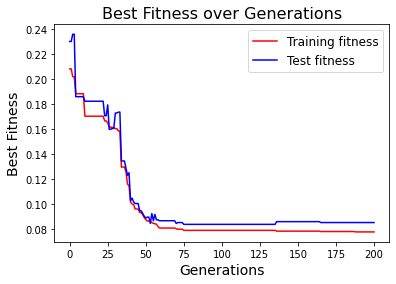

In [16]:
plt.plot(gen, min_fitness_values, color='red', label="Training fitness")
plt.plot(gen, fitness_test, color='blue', label="Test fitness")
plt.legend(fontsize=12)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Best Fitness', fontsize=14)
plt.title('Best Fitness over Generations', fontsize=16)
plt.show()


Plot graph regarding the average fitness in each generation considering the training set.

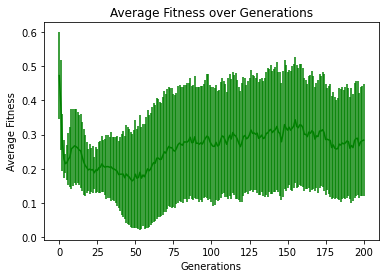

In [17]:
plt.xlabel('Generations')
plt.ylabel('Average Fitness')
plt.title('Average Fitness over Generations')
plt.errorbar(gen, mean_fitness_values, yerr=std_fitness_values,label="Best", color="Green")
plt.show()

Plot graphs regarding the length of the genome: the maximum value, the average of the population and that one of the best individual.


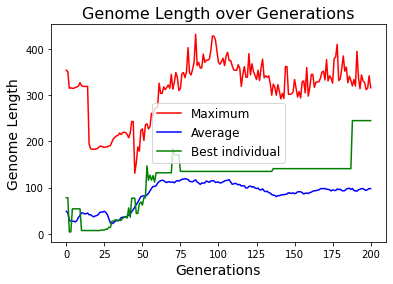

In [18]:
plt.plot(gen, max_length, color='red', label="Maximum")
plt.plot(gen, avg_length, color='blue', label="Average")
plt.plot(gen, best_ind_length, color='green', label="Best individual")
plt.legend(fontsize=12)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Genome Length', fontsize=14)
plt.title('Genome Length over Generations', fontsize=16)
plt.show()